In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#data collection and preprocessing

#loading the dataset into pandas dataframe
df=pd.read_csv(r'train - loanstatus.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [5]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
#Convert all categorical columns to numerical values

In [7]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [9]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [10]:
df['Married']=df['Married'].map({'No':0,'Yes':1})

In [11]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [12]:
df['Education']=df['Education'].map({'Not Graduate':0,'Graduate':1})

In [13]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [14]:
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})

In [15]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [16]:
df['Property_Area']=df['Property_Area'].map({'Semiurban':0,'Urban':1,'Rural':2})

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,2,Y
610,0.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,2,Y
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,Y
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,Y


In [18]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 57.7+ KB


In [20]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [21]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,2,Y
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,2,Y
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,Y
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,Y


In [22]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [23]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,2,1
610,0.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,2,1
611,0.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,0.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [25]:
type(df)

pandas.core.frame.DataFrame

In [26]:
#number of missing values in each column
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df.shape

(614, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


In [29]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.369612,-0.175970,0.049258,0.009829,-0.053989,-0.083946,-0.106947,0.075117,-0.016337,-0.111964,-0.019857
Married,-0.369612,1.000000,0.343417,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,-0.004754,0.089280
Dependents,-0.175970,0.343417,1.000000,-0.059161,0.057867,0.118679,0.027259,0.163997,-0.100484,-0.050082,-0.005747,0.006781
Education,0.049258,-0.014223,-0.059161,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,-0.066740,0.085884
Self_Employed,0.009829,0.001909,0.057867,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,0.009740,-0.002303
ApplicantIncome,-0.053989,0.051332,0.118679,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.017321,-0.004710
CoapplicantIncome,-0.083946,0.077770,0.027259,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.019087,-0.059187
LoanAmount,-0.106947,0.149519,0.163997,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,0.029437,-0.037318
Loan_Amount_Term,0.075117,-0.103810,-0.100484,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.017506,-0.021268
Credit_History,-0.016337,0.004381,-0.050082,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.036906,0.561678


<Axes: >

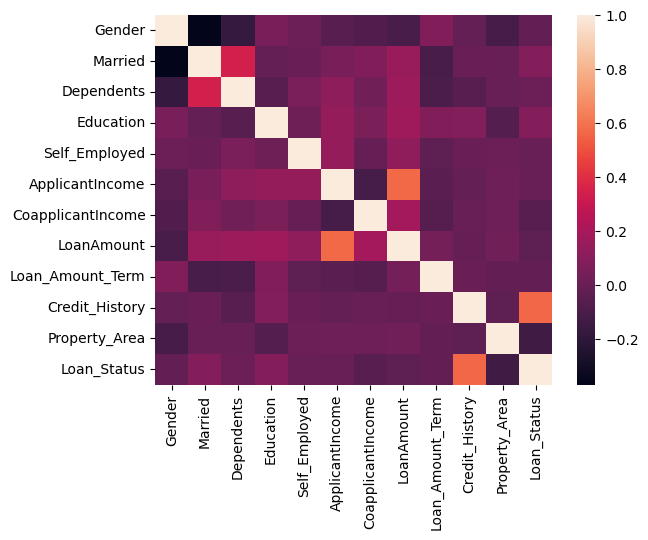

In [30]:
sns.heatmap(df.corr())

In [31]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [32]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.186356,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.912052,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [33]:
#dropping the missing values
df=df.dropna()

In [34]:
df.shape

(480, 12)

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
#label encoding   Key and value
#  df.replace({"Loan_Status":{'N':0,'Y':1},"Married":{'No':0,'Yes':1},"Property_Area":{'Semi Urban':0,'Urban':1,'Rural':0},
#  'Education':{'Not Graduate':0,'Graduate':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1}},inplace=True)

In [37]:
#Dependent column values
#df['Dependents'].value_counts()
#df=df.replace(to_replace='3+',value=4)

<Axes: xlabel='Education', ylabel='count'>

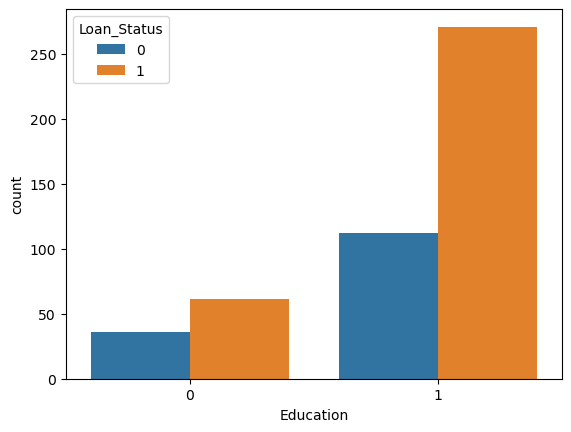

In [38]:
#Data visualization

#education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

#loan is approved greater for graduates

<Axes: xlabel='Married', ylabel='count'>

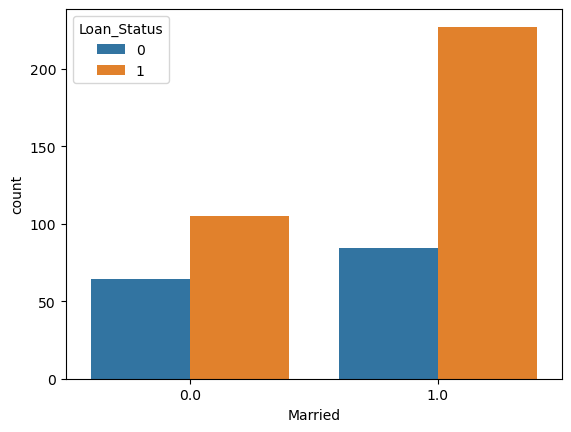

In [39]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=df)

#high chance for approval of loan for married applicants

In [40]:
#splitting the data into features and label data

#X=df.drop(columns=['Loan_ID,Loan_Status'],axis=1)

X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']
print(X)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       0.0      1.0         1.0          1            0.0             4583   
2       0.0      1.0         0.0          1            1.0             3000   
3       0.0      1.0         0.0          0            0.0             2583   
4       0.0      0.0         0.0          1            0.0             6000   
5       0.0      1.0         2.0          1            1.0             5417   
..      ...      ...         ...        ...            ...              ...   
609     1.0      0.0         0.0          1            0.0             2900   
610     0.0      1.0         3.0          1            0.0             4106   
611     0.0      1.0         1.0          1            0.0             8072   
612     0.0      1.0         2.0          1            0.0             7583   
613     1.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [41]:
#splitting the data into train and test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [43]:
print(y.shape,y_train.shape,y_test.shape)

(480,) (432,) (48,)


In [44]:
#training the SVM model

classifier=svm.SVC(kernel='linear')

In [45]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [46]:
#model evaluation

#accuracy_on_training_data

X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.7893518518518519


In [47]:
#accuracy_on_training_data

X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print("Accuracy on test data:", test_data_accuracy)

Accuracy on test data: 0.7916666666666666


In [48]:
#build predictive model

input_data=(1.0,0.0,0.0,1,1.0,4583,0.0,133.0,360.0,0.0,0)

#change the input data to a numpy array
input_data_numpyarray=np.asarray(input_data)

#reshaping array - need to find the prediction for only one instance
inputdata_reshape=input_data_numpyarray.reshape(1,-1)

prediction=classifier.predict(inputdata_reshape)
print(prediction)

if(prediction==0):
    print("Loan Rejected")
else:
    print("Loan Approved")

[0]
Loan Rejected


C:\Users\onita\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [49]:
#build predictive model

input_data=(0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1)

#change the input data to a numpy array
input_data_numpyarray=np.asarray(input_data)

#reshaping array - need to find the prediction for only one instance
inputdata_reshape=input_data_numpyarray.reshape(1,-1)

prediction=classifier.predict(inputdata_reshape)
print(prediction)

if(prediction==0):
    print("Loan Rejected")
else:
    print("Loan Approved")

[1]
Loan Approved


C:\Users\onita\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
